# Common import and setup


In [1]:
import os, sys, time, pytest

import matplotlib.pyplot as plt
from matplotlib import patches, lines
import numpy as np
import pandas as pd
from pandas.testing import assert_frame_equal

import pdfminer

from IPython.display import display

# Make sure we use the local version of camelot if it is here
sys.path.insert(0, os.path.abspath(''))

import camelot
from camelot.core import Table, TableList, TextEdges
from camelot.__version__ import generate_version
from camelot.utils import get_text_objects, text_in_bbox
from camelot.parsers.stream import Stream
from camelot.parsers.lattice import Lattice
from camelot.parsers.network import Network
from camelot.parsers.hybrid import Hybrid
from camelot.handlers import PDFHandler
from camelot.plotting import draw_pdf
from tests.data import *

testdir = os.path.dirname(os.path.abspath('.'))
testdir = os.path.join(testdir, "camelot/tests/files")

# To check which library we're using
camelot.__file__


'/Users/francoishuet/Code/camelot/camelot/__init__.py'

## Selection of file to review

This is seeded with the unit test files for convenience.

In [2]:
kwargs = {}
data = None
# pdf_file, kwargs, data = "superscript.pdf", {"flag_size": True}, data_stream_flag_size # test_hybrid_flag_size
# pdf_file = "health.pdf"  # test_hybrid
# pdf_file = "clockwise_table_2.pdf"
# pdf_file = "tabula/12s0324.pdf" # interesting because contains two separate tables
# pdf_file = "clockwise_table_2.pdf"  # test_hybrid_table_rotated / test_stream_table_rotated
# pdf_file, kwargs = "tabula/us-007.pdf", {"table_regions": ["320,335,573,505"]} # test_hybrid_table_regions
# pdf_file, kwargs = "detect_vertical_false.pdf", {"strip_text": " ,\n"}  # data_stream_strip_text
# pdf_file, kwargs, data = "tabula/m27.pdf", {"columns": ["72,95,209,327,442,529,566,606,683"], "split_text": True, }, data_stream_split_text  # data_stream_split_text
# pdf_file = "vertical_header.pdf"
# pdf_file, kwargs = "vertical_header.pdf", {"pages": "2"}
# pdf_file, kwargs = "PIR_Prospetto.dOfferta.pdf", {"pages": "6"}
# pdf_file = "twotables_2.pdf"
# pdf_file = "camelot-issue-132-multiple-tables.pdf"
# pdf_file, kwargs, data = "edge_tol.pdf", {"edge_tol": 500}, data_stream_edge_tol
# pdf_file, kwargs, data = "edge_tol.pdf", {}, data_stream_edge_tol
# pdf_file, kwargs = "tabula/icdar2013-dataset/competition-dataset-us/us-030.pdf", {"pages": "2"}  # test_lattice
pdf_file, kwargs = "background_lines_1.pdf", {"process_background": True}  # test_lattice_process_background

filename = os.path.join(testdir, pdf_file)

Found 2 table(s) via algo lattice:
Flavor lattice table 0:


0 1 2
0  The Red Ribbon Express (RRE) is the world’s la...    
1                                                       
2

After Flavor lattice table 0:
Flavor lattice table 1:


0                          1                2            3  \
0        State                       Date  Halt \nstations  Halt \ndays   
1        Delhi                  1.12.2009                8           17   
2    Rajasthan  2.12.2009 to \n19.12.2009                                 
3      Gujarat   20.12.2009 to \n3.1.2010                6           13   
4  Maharashtra    4.01.2010 to \n1.2.2010               13           26   
5    Karnataka    2.2.2010 to \n22.2.2010               11           19   
6       Kerala   23.2.2010 to \n11.3.2010                9           17   
7        Total                                          47           92   

                                         4                  5  \
0  Persons \ndirectly \nreached\n(in lakh)  Persons \ntrained   
1                                     1.29              3,665   
2                                                               
3                                     6.03              3,810   
4                                     1.27              5,680   
5                                     1.80              5,741   
6                                     1.42              3,559   
7                                    11.81             22,455   

                     6                          7  
0  Persons \ncounseled  Persons \ntested\nfor HIV  
1                2,409                      1,000  
2                                                  
3                2,317                      1,453  
4                9,027                      4,153  
5                3,658                      3,183  
6                2,173                        855  
7               19,584                     10,644

After Flavor lattice table 1:
Found 3 table(s) via algo hybrid:
Same table as found in lattice table 0
Flavor hybrid table 1:


0              1         2     3          4        5          6  \
0         State           Date      Halt  Halt    Persons  Persons    Persons   
1                               stations  days   directly  trained  counseled   
2                                                 reached                       
3                                               (in lakh)                       
4         Delhi      1.12.2009         8    17       1.29    3,665      2,409   
5     Rajasthan   2.12.2009 to                                                  
6                   19.12.2009                                                  
7       Gujarat  20.12.2009 to         6    13       6.03    3,810      2,317   
8                     3.1.2010                                                  
9   Maharashtra   4.01.2010 to        13    26       1.27    5,680      9,027   
10                    1.2.2010                                                  
11    Karnataka    2.2.2010 to        11    19       1.80    5,741      3,658   
12                   22.2.2010                                                  
13       Kerala   23.2.2010 to         9    17       1.42    3,559      2,173   
14                   11.3.2010                                                  
15        Total                       47    92      11.81   22,455     19,584   

          7  
0   Persons  
1    tested  
2   for HIV  
3            
4     1,000  
5            
6            
7     1,453  
8            
9     4,153  
10           
11    3,183  
12           
13      855  
14           
15   10,644

After Flavor hybrid table 1:
Flavor hybrid table 2:


0  \
0   It includes visitors to train exhibition and t...   
1   about  injecting  drug  use  and  unprotected ...   
2   reducing  stigma  and  discrimination  associated   
3    attached \nto \nHIV/AIDS \nand \npromoting \nHIV   
4   related  services.  The  music  competitions  and   
5   football  tournaments  organised  at  district...   
6    culminated in the state level mega events, which   
7                       saw huge youth participation.   
8                                                       
9   Faith  based  organisations  were  also  sensi...   
10  and  involved  in  the  campaign.  A  special ...   
11   was made to reach out to the out-of-school youth   
12  in  the  states  through  training  of  youth ...   
13  district,  block  and  village \nlevels.  The ...   
14  of  the  music  competitions  positioned  as  ...   
15   icons" are further reaching out with messages on   
16    HIV/AIDS to the community through road shows at   
17  village/block level in their respective distri...   

                                                    1  
0                                                      
1         Radio programmes: Three radio programmes in  
2     Hindi – “Babli Boli”, “5 Down Mohabbat Express”  
3   and  “Kitne  Door,  Kitne  Pass”  were  launch...  
4   NACO,  targeting  rural  women,  rural  youth ...  
5     urban  migrants  respectively.  The  programmes  
6   were  aired \nfor \nsix  months \nfrom  Septem...  
7   2009  to  March,  2010.  The  duration  of  th...  
8   episode  was  half  an  hour  and \ntwo  episodes  
9      of  each  programme  were  aired  every  week.  
10  The  programmes  were \nlinked \nto \nthe  ground  
11  mobilisation  in  21  vulnerable  districts,  ...  
12  states  of  UP,  Bihar,  Rajasthan,  MP  and  ...  
13    through 100 Radio Listener Clubs formed in each  
14   of these districts. The radio clubs promoted not  
15  only  listenership  of  the  programmes,  but ...  
16  helped  in  further  dissemination  of  messag...  
17     the communities. The SACS also produce and air

After Flavor hybrid table 2:


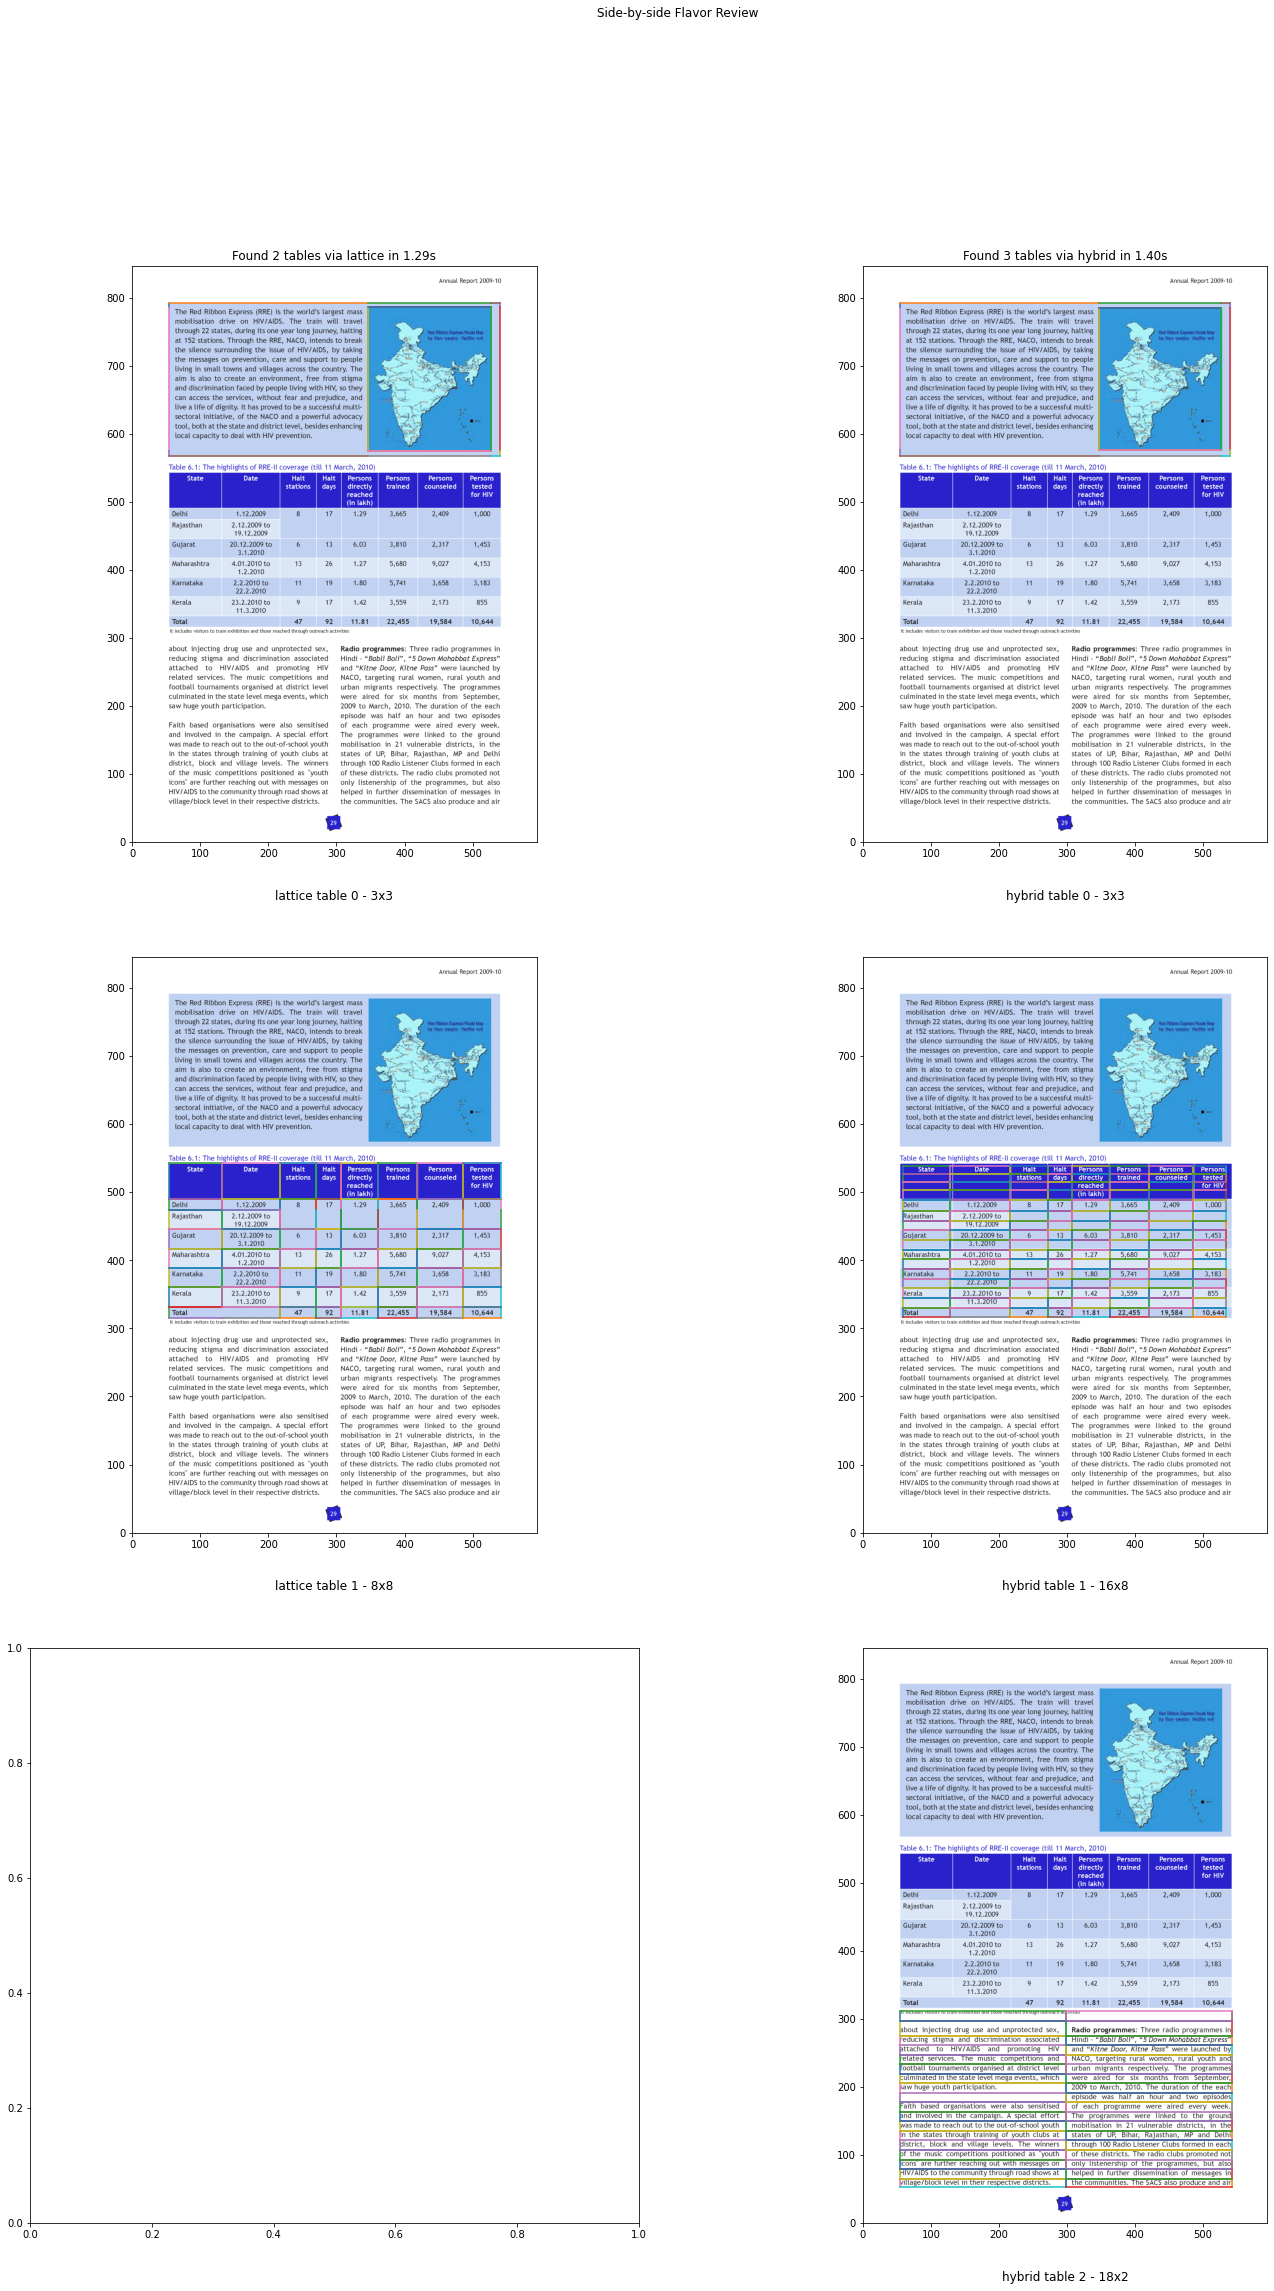

In [3]:
# FLAVORS = ["stream", "lattice", "network", "hybrid"]
FLAVORS = ["lattice", "hybrid"]
tables_parsed = {}
parses = {}
max_tables = 0
for idx, flavor in enumerate(FLAVORS):
    timer_before_parse = time.perf_counter()
    tables = camelot.read_pdf(filename, flavor=flavor, debug=True, **kwargs)
    timer_after_parse = time.perf_counter()
    max_tables = max(max_tables, len(tables))

    parses[flavor] = {
        "tables": tables,
        "time": timer_after_parse - timer_before_parse
    }

    print("Found {count_tables} table(s) via algo {flavor}:".format(
        count_tables=len(tables),
        flavor=flavor
    ))
    for idx, table in enumerate(tables):
        flavors_matching = []
        for previous_flavor, previous_tables in tables_parsed.items():
            for prev_idx, previous_table in enumerate(previous_tables):
                if previous_table.df.equals(table.df):
                    flavors_matching.append(
                        "{previous_flavor} table {prev_idx}".format(
                            previous_flavor=previous_flavor, prev_idx=prev_idx))
        if flavors_matching:
            print("Same table as found in {}".format(", ".join(flavors_matching)))
        else:
            print("Flavor {} table {}:".format(flavor, idx))
            display(table.df)
            print("After Flavor {} table {}:".format(flavor, idx))
    tables_parsed[flavor] = tables


# Set up plots to be large enough for visualization
PLOT_HEIGHT = 12
plt.rcParams["figure.figsize"] = [PLOT_HEIGHT * len(FLAVORS), PLOT_HEIGHT * max_tables]
fig, axes = plt.subplots(max_tables, len(FLAVORS))
fig.suptitle('Side-by-side Flavor Review')
for idx, flavor in enumerate(FLAVORS):
    parse = parses[flavor]
    tables = parse["tables"]
    parse_time = parse["time"]
    for table_idx, table in enumerate(tables):
        if max_tables > 1:
            ax = axes[table_idx][idx]
        else:
            ax = axes[idx]
        fig = camelot.plot(table, kind='grid', ax=ax)
        if table_idx == 0:
            ax.set_title("Found {table_num} tables via {flavor} in {parse_time:.2f}s".format(
                table_num=len(tables),
                flavor=flavor,
                parse_time=parse_time,
            ))
        ax.text(
            0.5,-0.1, 
            "{flavor} table {table_idx} - {rows}x{cols}".format(
                flavor=flavor,
                table_idx=table_idx,
                rows=table.shape[0],
                cols=table.shape[1],
            ), 
            size=12, ha="center", 
            transform=ax.transAxes
        )
        timer_after_plot = time.perf_counter()

fig

In [4]:
type(axes)

numpy.ndarray

In [5]:
df = parses["lattice"]["tables"][0].df
(df[df.astype(bool)]).dropna(axis=0, how='all').dropna(axis=1, how='all')

0
0  The Red Ribbon Express (RRE) is the world’s la...